In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [10]:
file_info = pd.read_csv('data\\precontrast_result_0613.csv')
file_result = pd.read_csv('data\\precontrast_radiomics_result.csv')
file_result = file_result.merge(file_info, on='Nr')
print(file_result.columns)
test = file_result[['ID_x', 'dataset', 'GT','original_firstorder_Skewness', 'original_firstorder_TotalEnergy', 'original_firstorder_Energy', 'original_glrlm_RunLengthNonUniformity', 'diagnostics_Image-original_Maximum', 'diagnostics_Image-interpolated_Minimum', 'original_glrlm_GrayLevelNonUniformity', 'original_shape_SurfaceArea', 'original_shape_MajorAxisLength', 'original_gldm_GrayLevelNonUniformity', 'diagnostics_Mask-interpolated_VoxelNum', 'original_shape_VoxelVolume', 'original_shape_Maximum2DDiameterColumn', 'original_shape_MeshVolume', 'original_shape_Maximum3DDiameter', 'original_shape_Maximum2DDiameterSlice', 'original_shape_MinorAxisLength', 'original_glszm_LargeAreaEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_LargeAreaLowGrayLevelEmphasis']]
print(test.shape)
test.to_csv('radiomics_result.csv')
column_name = file_result.columns.to_list()

remove_features = ['Unnamed: 0_x', 'ID', 'Image_x', 'Mask_x', 'value_x','Unnamed: 0_y', 
                   'Image_y', 'Mask_y', 'value_y', 'dataset', 'GT']
del column_name[0:5]
# del column_name[1:3]
del column_name[-6:]

Index(['Nr', 'ID_x', 'Image_x', 'Mask_x', 'value_x',
       'diagnostics_Image-original_Mean', 'diagnostics_Image-original_Minimum',
       'diagnostics_Image-original_Maximum',
       'diagnostics_Image-interpolated_Mean',
       'diagnostics_Image-interpolated_Minimum',
       ...
       'original_ngtdm_Coarseness', 'original_ngtdm_Complexity',
       'original_ngtdm_Contrast', 'original_ngtdm_Strength', 'ID_y', 'Image_y',
       'Mask_y', 'value_y', 'dataset', 'GT'],
      dtype='object', length=129)
(1412, 23)


In [3]:
roc_list = []
for feature in column_name:
    y_true = np.array(file_result[['GT']])
    x = np.array(file_result[[feature]])
    lr = LinearRegression()
    lr.fit(x, y_true)
    y_pred = lr.predict(x)
    print(feature, roc_auc_score(y_true, y_pred))
    
    # plt.scatter(x.flatten(),y_true.flatten(),c='blue')
    # plt.plot(x,y_pred,'r')
    # plt.show()
    roc_list.append(roc_auc_score(y_true, y_pred))

diagnostics_Image-original_Mean 0.5104044355484713
diagnostics_Image-original_Minimum 0.6334943531525613
diagnostics_Image-original_Maximum 0.6900135264759981
diagnostics_Image-interpolated_Mean 0.7299450220743164
diagnostics_Image-interpolated_Minimum 0.4557590948820439
diagnostics_Image-interpolated_Maximum 0.5255269140369129
diagnostics_Mask-interpolated_VoxelNum 0.6309594063763038
diagnostics_Mask-interpolated_VolumeNum 0.5412344582413148
diagnostics_Mask-interpolated_Mean 0.7383955206476485
diagnostics_Mask-interpolated_Minimum 0.6879480518427035
diagnostics_Mask-interpolated_Maximum 0.6771451226610046
original_shape_Elongation 0.5075024284790116
original_shape_Flatness 0.6551894416424833
original_shape_LeastAxisLength 0.49950416441056406
original_shape_MajorAxisLength 0.6738415800221857
original_shape_Maximum2DDiameterColumn 0.6470309689377762
original_shape_Maximum2DDiameterRow 0.5955553257203812
original_shape_Maximum2DDiameterSlice 0.6467500968349669
original_shape_Maximum3DDi

In [6]:
# feature_select = pd.DataFrame({'feature':column_name,'feature_roc':roc_list})
# feature_select = feature_select.sort_values('feature_roc',ascending=False)
# print(feature_select)
# feature_select_list = feature_select['feature'].iloc[0:20].tolist()
# print(feature_select_list)
feature_select_list = ['original_firstorder_Skewness', 'original_firstorder_TotalEnergy', 'original_firstorder_Energy', 'original_glrlm_RunLengthNonUniformity', 'diagnostics_Image-original_Maximum', 'diagnostics_Image-interpolated_Minimum', 'original_glrlm_GrayLevelNonUniformity', 'original_shape_SurfaceArea', 'original_shape_MajorAxisLength', 'original_gldm_GrayLevelNonUniformity', 'diagnostics_Mask-interpolated_VoxelNum', 'original_shape_VoxelVolume', 'original_shape_Maximum2DDiameterColumn', 'original_shape_MeshVolume', 'original_shape_Maximum3DDiameter', 'original_shape_Maximum2DDiameterSlice', 'original_shape_MinorAxisLength', 'original_glszm_LargeAreaEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_LargeAreaLowGrayLevelEmphasis']


In [38]:
file_train_val = file_result[file_result['dataset']=='data_train_val']
file_test1 = file_result[file_result['dataset']=='data_test1']
file_test2 = file_result[file_result['dataset']=='data_test2']
file_testHK = file_result[file_result['dataset']=='testHK']
print(file_testHK.shape)
print(file_train_val.shape)

(253, 131)
(758, 131)


In [18]:
X = np.array(file_train_val[feature_select_list])
Y = np.array(file_train_val['GT'])
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=2022)
print(x_train.shape, x_val.shape)

(606, 20) (152, 20)


In [19]:
param = {'max_depth':2, 'eta':0.1,  'objective':'binary:logistic' }
param['eval_metric']='auc'
dtrain=xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_val, label=y_val)
num_round=20
bst = xgb.train(param, dtrain, num_round)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

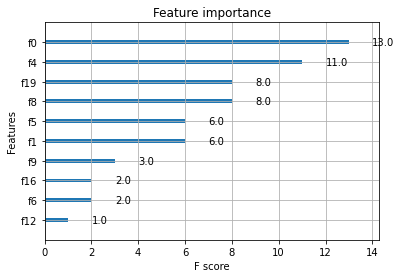

In [20]:
y_xgb_pred = bst.predict(dtest, iteration_range=(0, bst.best_iteration))
xgb.plot_importance(bst)

In [21]:
def evaluate_xgboost(xgboost_dataset,label, threshold):
    y_train_predic = bst.predict(xgboost_dataset, iteration_range=(0, bst.best_iteration) )
    fpr_tr, tpr_tr, threshold_tr = metrics.roc_curve(label, y_train_predic)
    y_train_predic_binary = np.where(y_train_predic>threshold, 1,0)
    roc_train = roc_auc_score(label, y_train_predic)
    tn, fp, fn, tp = confusion_matrix(label, y_train_predic_binary).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (fp + tn)
    PPV =tp/(tp+fp)
    NPV = tn / (tn+fn)
    ACC = (tp+ tn)/(tn+fp+fn+tp)
   
    return roc_auc_score(label, y_train_predic),sensitivity, specificity, PPV, NPV, ACC, fpr_tr, tpr_tr

In [22]:
AUC_train, sen_train, spe_train, ppv_train, npv_train, acc_train, fpr_train, tpr_train = evaluate_xgboost(dtrain, y_train, 0.5)
print (AUC_train, sen_train, spe_train, ppv_train, npv_train, acc_train)

0.9287540547846458 0.8659217877094972 0.8024193548387096 0.8635097493036211 0.805668016194332 0.8399339933993399


In [23]:
dataset_test = xgb.DMatrix(x_val, label=y_val)
AUC_test, sen_test, spe_test, ppv_test, npv_test, acc_test, fpr_test, tpr_test = evaluate_xgboost(dtest, y_val,0.4)
print (AUC_test, sen_test, spe_test, ppv_test, npv_test, acc_test)

0.8643207282913165 0.8452380952380952 0.6764705882352942 0.7634408602150538 0.7796610169491526 0.7697368421052632


In [24]:
dtest_all = xgb.DMatrix(file_result[feature_select_list])
y_all_predic = bst.predict(dtest_all, iteration_range=(0, bst.best_iteration) )
y_all_predic_binary = np.where(y_all_predic>0.5, 1,0)
print(file_result.shape)
file_result.insert(loc=4, column = "radiomics_prediction", value = y_all_predic )
file_result.insert(loc=4, column= 'radiomics_binary', value= y_all_predic_binary)
print(file_result.shape)

(1412, 129)
(1412, 131)


In [25]:
file_result.to_csv('data\\precontrast_result_1203.csv')

In [161]:
X = np.array(file_test1[feature_select_list])
Y = np.array(file_test1['GT'])
test1=xgb.DMatrix(X, label=Y)
AUC_test1, sen_test1, spe_test1, ppv_test1, npv_test1, acc_test1, fpr_test1, tpr_test1 = evaluate_xgboost(test1, Y, 0.5)
print (AUC_test1, sen_test1, spe_test1, ppv_test1, npv_test1, acc_test1)

0.8596591967223292 0.4606741573033708 0.9613259668508287 0.9213483146067416 0.6444444444444445 0.713091922005571


In [164]:
X1 = np.array(file_test2[feature_select_list])
Y1 = np.array(file_test2['GT'])
test2=xgb.DMatrix(X1, label=Y1)
AUC_test2, sen_test2, spe_test2, ppv_test2, npv_test2, acc_test2, fpr_test2, tpr_test2 = evaluate_xgboost(test2, Y1, 0.3)    
print (AUC_test2, sen_test2, spe_test2, ppv_test2, npv_test2, acc_test2)

0.4991789819376027 0.896551724137931 0.19047619047619047 0.6046511627906976 0.5714285714285714 0.6


In [34]:
X1 = np.array(file_testHK[feature_select_list])
Y1 = np.array(file_testHK['GT'])
print(X1.shape, Y1.shape)
testhk=xgb.DMatrix(X1, label=Y1)
AUC_testHK, sen_testHK, spe_testHK, ppv_testHK, npv_testHK, acc_testHK, fpr_testHK, tpr_testHK = evaluate_xgboost(testhk, Y1, 0.3)    
print (AUC_testHK, sen_testHK, spe_testHK, ppv_testHK, npv_testHK, acc_testHK)

(0, 20) (0,)
[14:14:03] WARNING: ..\src\learner.cc:1265: Empty dataset at worker: 0


ValueError: y should be a 1d array, got an array of shape (0, 0) instead.

In [39]:
file_info[['value', 'dataset', 'GT']]
file_info= file_info.drop(index=file_info[(file_info.value=='na')].index.tolist())
file_info['value'] = pd.to_numeric(file_info['value'])
dataset_result_1 = file_info[file_info['dataset']=='data_train_val']
dataset_result_2 = file_info[file_info['dataset']=='data_test1']
dataset_result_3 = file_info[file_info['dataset']=='data_test2']
dataset_resultHK = file_info[file_info['dataset']=='testHK']

In [27]:
def calculate_seg_results(df_list_pred, df_list_gt):
    label_array = np.array(df_list_gt)
    pred_array = np.array(df_list_pred)
    tn, fp, fn, tp = confusion_matrix(label_array, pred_array).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (fp + tn)
    PPV =tp/(tp+fp)
    NPV = tn / (tn+fn)
    ACC = (tp+ tn)/(tn+fp+fn+tp)
    return sensitivity, specificity, PPV, NPV, ACC

In [28]:

calculate_seg_results(dataset_result_1[['value']],dataset_result_1[['GT']])

(0.920814479638009,
 0.9208860759493671,
 0.9421296296296297,
 0.8926380368098159,
 0.920844327176781)

In [29]:
calculate_seg_results(dataset_result_2[['value']],dataset_result_2[['GT']])

(0.8850574712643678,
 0.9886363636363636,
 0.9871794871794872,
 0.8969072164948454,
 0.9371428571428572)

In [30]:
calculate_seg_results(dataset_result_3[['value']],dataset_result_3[['GT']])

(0.8076923076923077,
 0.7142857142857143,
 0.7777777777777778,
 0.75,
 0.7659574468085106)

In [40]:
calculate_seg_results(dataset_resultHK[['value']],dataset_resultHK[['GT']])

(0.8880597014925373,
 0.7058823529411765,
 0.7727272727272727,
 0.8484848484848485,
 0.8023715415019763)

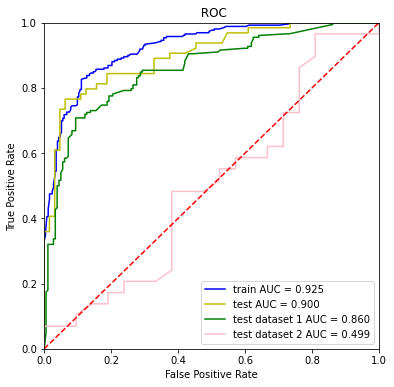

In [163]:
plt.figure(figsize=(6,6))
plt.title(' ROC')
plt.plot(fpr_train, tpr_train, 'b', label = 'train AUC = %0.3f' % AUC_train)
plt.plot(fpr_test, tpr_test, 'y', label = 'test AUC = %0.3f' % AUC_test)
plt.plot(fpr_test1, tpr_test1, 'g', label = 'test dataset 1 AUC = %0.3f' % AUC_test1)
plt.plot(fpr_test2, tpr_test2, 'pink', label = 'test dataset 2 AUC = %0.3f' % AUC_test2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [13]:
pancr_class_train = pd.read_csv('data\\pancr_class_result1.csv')
print(pancr_class_train.shape)
pancr_test1 = pd.read_csv('data\\pancr_class_result2.csv')
print(pancr_test1.shape)
pancr_test2 = pd.read_csv('data\\pancr_class_result3.csv')
print(pancr_test2.shape)

(17105, 6)
(8434, 5)
(952, 5)


In [15]:
pancr_class = pd.concat([pancr_class_train, pancr_test1, pancr_test2])
test = pancr_class.groupby('ID')['prediction'].agg(['max'])
print(test)

                    max
ID                     
02264499_0000  0.000143
03109833_0000  0.999919
03510622_0000  0.999961
03589139_0000  0.999889
03606242_0000  0.994619
...                 ...
S70930_0000    0.000122
S96150_0000    0.999087
S97610_0000    0.000016
ST00001_0000   0.000101
ST00002_0000   0.000039

[971 rows x 1 columns]


In [16]:
test.to_csv('class_result_prediction.csv')

In [18]:
pancr_class_train = pd.read_csv('data\\pancr_extended_result.csv')
test_extended = pancr_class_train.groupby('ID')['prediction'].agg(['max'])
print(test_extended)

                        max
ID                         
02264499_0000      0.862279
03109833_0000      0.000016
03510622_0000      0.999972
03589139_0000      0.993599
03606242_0000      0.997813
...                     ...
TCGA-G3-A7M8_0000  0.014091
TCGA-G3-AAUZ_0000  0.999833
TCGA-G3-AAV4_0000  0.006720
TCGA-G3-AAV5_0000  0.999979
TCGA-K7-A5RG_0000  0.045018

[103 rows x 1 columns]


In [20]:
test_extended.to_csv('class_extended_prediction.csv')